In [1]:
import os
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
os.chdir('Actividad_20')

In [4]:
df = pd.read_csv('vgsales_clean.csv', index_col=0)

In [5]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
# Como esta incompleta la data del 2016, 2017 y 2020, los excluiremos para este análisis
# Utilizaremos como últimos 4 años: 2015, 2014, 2013 y 2012

df['Year'].value_counts().reset_index().sort_values(by='Year').tail(10)

,Year,count
1,2009,1461
2,2010,1284
4,2011,1139
10,2012,657
13,2013,555
12,2014,583
11,2015,614
17,2016,344
37,2017,3
38,2020,1


In [8]:
df2 = df[df['Year'].isin([2015,2014,2013,2012,2011])]

In [9]:
df2.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8922,8924,Ore no Imouto ga Konna ni Kawaii wake ga Nai P...,PSP,2011,Adventure,Banpresto,0.00,0.00,0.15,0.00,0.15
14286,14289,Super Robot Taisen OG Saga: Masou Kishin III -...,PSV,2013,Strategy,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
13721,13723,S.Y.K Renshouden Portable,PSP,2011,Adventure,Idea Factory,0.00,0.00,0.04,0.00,0.04
4852,4854,Wii Sports Club,WiiU,2014,Sports,Nintendo,0.19,0.14,0.04,0.03,0.40
5992,5994,The Bureau: XCOM Declassified,PS3,2013,Shooter,Take-Two Interactive,0.08,0.16,0.00,0.05,0.29


### Crecimiento en Ventas

#### 1) ¿Qué género ha tenido el mayor y menor crecimiento?

In [10]:
df2_generos = df2[['Genre','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

In [11]:
df2_generos_cross = pd.crosstab(df2_generos['Genre'], df2_generos['Year'],
                                    values=df2_generos['Global_Sales'],
                                    aggfunc='sum')

In [12]:
df2_generos_cross.T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2011,118.96,15.98,22.68,56.08,28.11,5.11,35.01,53.37,99.36,15.28,56.99,9.06
2012,122.04,5.99,9.51,22.92,18.55,1.76,14.46,47.81,72.86,13.38,30.93,3.33
2013,125.63,6.69,7.21,25.65,25.12,0.99,13.12,44.95,62.87,9.16,41.57,6.33
2014,99.02,6.06,16.15,23.68,8.89,1.50,16.69,46.16,66.00,5.55,46.66,0.99
2015,70.70,8.03,7.78,11.69,6.05,0.70,7.92,36.44,66.15,5.62,41.54,1.82


In [13]:
df2_generos_crec = df2_generos_cross.T.pct_change(fill_method=None).reset_index().drop(0).set_index('Year')

In [14]:
df2_generos_crec

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2012,0.03,-0.63,-0.58,-0.59,-0.34,-0.66,-0.59,-0.10,-0.27,-0.12,-0.46,-0.63
2013,0.03,0.12,-0.24,0.12,0.35,-0.44,-0.09,-0.06,-0.14,-0.32,0.34,0.90
2014,-0.21,-0.09,1.24,-0.08,-0.65,0.52,0.27,0.03,0.05,-0.39,0.12,-0.84
2015,-0.29,0.33,-0.52,-0.51,-0.32,-0.53,-0.53,-0.21,0.00,0.01,-0.11,0.84


<Axes: xlabel='Genre'>

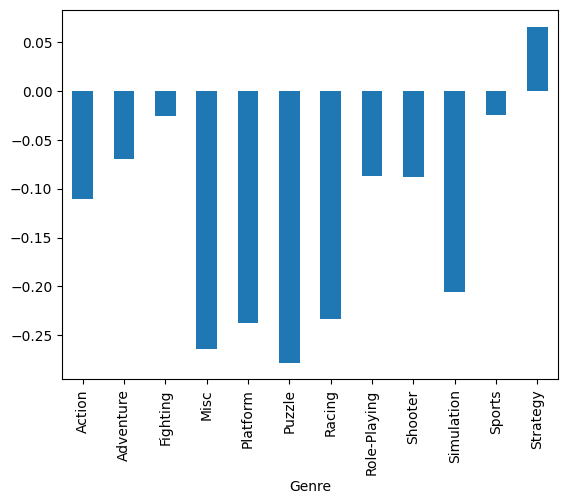

In [15]:
# Observamos que, en promedio, del 2012 al 2015, el genéro con mayor crecimiendo fue Strategy
# Mientras que el género con menor crecimiento promedio es Puzzle
df2_generos_crec.mean().plot.bar()

#### 2) ¿Qué plataforma ha tenido el mayor y menor crecimiento?

In [16]:
df2_plataformas = df2[['Platform','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

In [17]:
df2_plataformas_cross = pd.crosstab(df2_plataformas['Platform'], df2_plataformas['Year'],
                                    values=df2_plataformas['Global_Sales'],
                                    aggfunc='sum')

In [18]:
df2_plataformas_cross.T

Platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Year,,,,,,,,,,,,
2011,62.53,27.80,35.25,0.47,159.37,NaN,17.89,5.15,62.41,NaN,145.12,NaN
2012,51.14,11.64,23.53,NaN,109.49,NaN,7.72,18.53,22.77,17.84,100.88,NaN
2013,57.06,1.96,12.83,NaN,117.39,24.76,3.19,12.69,9.36,21.84,89.61,18.60
2014,43.14,0.02,13.39,NaN,50.96,98.76,0.24,15.04,4.44,22.51,36.42,52.43
2015,26.99,NaN,8.07,NaN,18.22,115.30,0.12,7.10,1.55,16.38,13.05,57.66


In [19]:
# En este paso quitamos las plataformas que llegaron al final de su ciclo de vida entre el 2012 y el 2015 (PS2 y DS)
df2_plataformas_crec = df2_plataformas_cross.T.pct_change(fill_method=None).reset_index().drop(0).drop(labels=['PS2','DS'], axis=1).set_index('Year')

In [20]:
df2_plataformas_crec

Platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Year,,,,,,,,,,
2012,-0.18,-0.33,-0.31,NaN,-0.57,2.60,-0.64,NaN,-0.30,NaN
2013,0.12,-0.45,0.07,NaN,-0.59,-0.32,-0.59,0.22,-0.11,NaN
2014,-0.24,0.04,-0.57,2.99,-0.92,0.19,-0.53,0.03,-0.59,1.82
2015,-0.37,-0.40,-0.64,0.17,-0.50,-0.53,-0.65,-0.27,-0.64,0.10


<Axes: xlabel='Platform'>

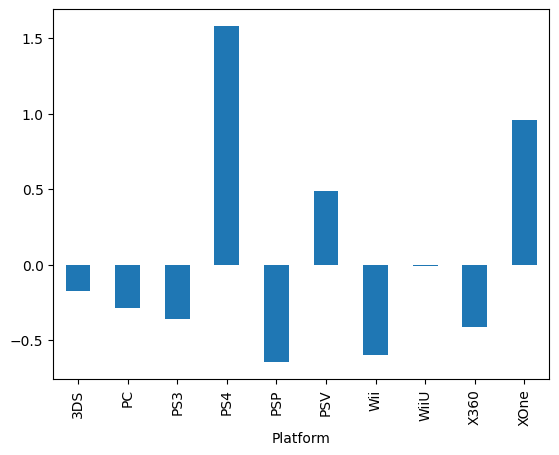

In [21]:
# Observamos que, en promedio, del 2012 al 2015, la plataforma con mayor crecimiento es el PS4
# MIentras que la plataforma con menor crecimiento es el PSP

df2_plataformas_crec.mean().plot.bar()

#### 3) ¿Qué videojuego ha tenido el mayor y menor crecimiento?

In [22]:
df2_titulos = df2[['Name','Publisher','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

In [23]:
df2_titulos_grouped = df2_titulos.groupby(['Name','Year','Publisher']).sum().reset_index()

In [24]:
df2_titulos_grouped_filter = df2_titulos_grouped.groupby('Name').count().reset_index()

In [25]:
# Generamos un filtro para quedarnos con los videojuegos con ventas registradas en más de 1 año, entre el 2012 y el 2015
titles_filter = df2_titulos_grouped_filter.loc[df2_titulos_grouped_filter['Year'] > 1]

In [26]:
df2_titulos_filtered = df2_titulos_grouped.loc[df2_titulos_grouped['Name'].isin(titles_filter['Name'].to_list())]

In [27]:
df2_titulos_cross = pd.crosstab(df2_titulos_filtered['Name'], df2_titulos_filtered['Year'],
                                    values=df2_titulos_filtered['Global_Sales'],
                                    aggfunc='sum')

In [28]:
df2_titulos_crec = df2_titulos_cross.T.pct_change(fill_method=None).reset_index().drop(0).set_index('Year')

In [29]:
df2_titulos_crec_mean = df2_titulos_crec.mean().reset_index(name='mean').dropna()

In [30]:
df2_titulos_crec_mean_pos = df2_titulos_crec_mean.loc[df2_titulos_crec_mean['mean'] >= 0].sort_values(by='mean', ascending=False)
df2_titulos_crec_mean_neg = df2_titulos_crec_mean.loc[df2_titulos_crec_mean['mean'] <= 0].sort_values(by='mean', ascending=True)

In [31]:
# El videojuego con mayor crecimiento en el dataset fue Divinity: Original Sin
df2_titulos_crec_mean_pos.head()

,Name,mean
29,Divinity: Original Sin,16.00
52,JoJo's Bizarre Adventure: All Star Battle,8.67
31,Don Bradman Cricket 14,4.33
59,Metal Gear Solid HD Edition,3.36
85,Sangoku Koi Senki: Otome no Heihou!,3.00


In [32]:
top_game = df2_titulos_crec_mean_pos['Name'].iloc[0]

In [33]:
print(f'El videojuego con mayor crecimiento en el dataset fue: {top_game}')

El videojuego con mayor crecimiento en el dataset fue: Divinity: Original Sin


In [34]:
# El videojuego con menor crecimiento en el dataset fue Sonic & All-Stars Racing Transformed
df2_titulos_crec_mean_neg.head()

,Name,mean
90,Sonic & All-Stars Racing Transformed,-1.00
89,Sniper Elite V2,-0.99
54,LEGO Batman 2: DC Super Heroes,-0.98
18,Dark Souls,-0.98
6,Assassin's Creed: Rogue,-0.97


In [35]:
bottom_game = df2_titulos_crec_mean_neg['Name'].iloc[0]

In [36]:
print(f'El videojuego con menor crecimiento en el dataset fue: {bottom_game}')

El videojuego con menor crecimiento en el dataset fue: Sonic & All-Stars Racing Transformed


#### 2 elementos adicionales que muestren oportunidades de mercado

In [37]:
df3 = df2[['Genre','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [38]:
df3_s = df3.set_index(['Genre','Year']).stack().reset_index(name='Sales').rename(columns={'level_2':'Region'})

In [39]:
df3_s_g = df3_s.groupby(['Genre','Year','Region']).sum().reset_index()

In [40]:
def graficar_ventas_genero(region):

    df3_filtered = df3_s_g.loc[(df3_s_g['Region'] == region) & (df3_s_g['Year'] >= 2012)].reset_index(drop=True)

    x = [df3_filtered['Genre'],
        df3_filtered['Year']]

    color_map = {
        'Action': 'crimson',
        'Adventure': 'seagreen',
        'Fighting': 'sienna',
        'Misc': 'steelblue',
        'Platform': 'orange',
        'Puzzle': 'indigo',
        'Racing': 'hotpink',
        'Role-Playing': 'turquoise',
        'Shooter': 'slategray',
        'Simulation': 'limegreen',
        'Sports': 'tomato',
        'Strategy': 'darkkhaki'
    }

    colors = [color_map[category] for category in x[0]]

    fig = go.Figure()
    fig.add_bar(x=x, y=df3_filtered['Sales'], marker_color=colors)
    fig.update_layout(title=df3_filtered['Region'][0])

    fig.show()

In [41]:
regions = df3_s_g['Region'].unique()

for r in regions:
    graficar_ventas_genero(r)

In [42]:
# Analicemos la relación entre las ventas y la cantidad de títulos lanzados por plataforma por region
df4 = df2[['Name','Platform','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [43]:
mean_NA_Sales = df4['NA_Sales'].mean()
mean_EU_Sales = df4['EU_Sales'].mean()
mean_JP_Sales = df4['JP_Sales'].mean()
mean_Other_Sales = df4['Other_Sales'].mean()

std_NA_Sales = np.std(df4['NA_Sales'])
std_EU_Sales = np.std(df4['EU_Sales'])
std_JP_Sales = np.std(df4['JP_Sales'])
std_Other_Sales = np.std(df4['Other_Sales'])

In [44]:
df4['NA_Sales'] = (df4['NA_Sales'] - mean_NA_Sales) / std_NA_Sales
df4['EU_Sales'] = (df4['EU_Sales'] - mean_EU_Sales) / std_EU_Sales
df4['JP_Sales'] = (df4['JP_Sales'] - mean_JP_Sales) / std_JP_Sales
df4['Other_Sales'] = (df4['Other_Sales'] - mean_Other_Sales) / std_Other_Sales

C:\Users\Jan_j\AppData\Local\Temp\ipykernel_37632\338926580.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jan_j\AppData\Local\Temp\ipykernel_37632\338926580.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jan_j\AppData\Local\Temp\ipykernel_37632\338926580.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [45]:
df5 = df4.set_index(['Name','Platform','Year']).stack().reset_index(name='Normalized Sales').rename(columns={'level_3':'Region','Name':'# titles'})

In [46]:
# ¿Aquí debería sumar o promediar las ventas normalizadas?
df5_g = df5.groupby(['Platform','Year','Region']).agg({'# titles':'nunique','Normalized Sales':'sum'}).reset_index()

In [47]:
# Consolas de sobremesa en linea continua, consolas portátiles en linea punteada

fig2 = px.line((df5_g.loc[df5_g['Platform'].isin(['PS4','XOne','WiiU','3DS','PSV'])]),
              x='# titles', y='Normalized Sales', color='Platform', text='Year', facet_col='Region',
              color_discrete_map={'PS4':'blue','WiiU':'red','XOne':'green','3DS':'red','PSV':'blue'},
              category_orders={'Region': ['NA_Sales','JP_Sales','EU_Sales','Other_Sales']})

fig2.update_layout(autosize=False, width=2400, height=800)
fig2.update_traces(textposition='top center')
fig2.update_traces(selector={'name':'3DS'}, line={'dash':'dash'})
fig2.update_traces(selector={'name':'PSV'}, line={'dash':'dash'})
fig2.show()